<a href="https://colab.research.google.com/github/Inuri92/CapstoneProject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maternal Health Risk

*   Age: Age of pregnant woman in years
*   SystolicBP: Upper value of Blood Pressure in mmHg
*   DiastolicBP: Lower value of Blood Pressure in mmHg
*   BS: Blood glucose levels in mmol/L
*   HeartRate: A normal resting heart rate in beats per minute
*   BodyTemp: Body temperature in F
*   RiskLevel: Risk Intensity Level during pregnancy



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#train test split
from sklearn.model_selection import train_test_split

# Classifier algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

# Data visualization
from matplotlib import cm # Colomaps
from sklearn import tree

# Model evaluation
from sklearn import metrics

#Load Data

In [ ]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1014.0,NaN,NaN,NaN,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,NaN,NaN,NaN,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,NaN,NaN,NaN,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,NaN,NaN,NaN,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,NaN,NaN,NaN,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,NaN,NaN,NaN,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0
RiskLevel,1014,3,low risk,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Pre-processing**

In [ ]:
# Check duplicates
duplicates = data[data.duplicated()]
duplicates

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


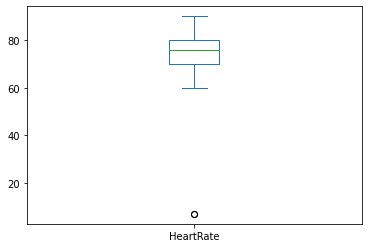

In [ ]:
data['HeartRate'].plot(kind='box')

In [ ]:
#Calculate Upper & Lower bound
q3 = np.quantile(data['HeartRate'], 0.75)
q1 = np.quantile(data['HeartRate'], 0.25)
IQR = q3-q1
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
data.loc[(data['HeartRate']<= lower_limit) | (data['HeartRate']>= upper_limit)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,y_act
499,16,120,75,7.9,98.0,7,low risk,0
908,16,120,75,7.9,98.0,7,low risk,0


In [ ]:
data.drop(data[(data['HeartRate']<= lower_limit) | (data['HeartRate']>= upper_limit)].index, inplace = True)

In [ ]:
data['RiskLevel'].value_counts()

low risk     404
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
# Assign numbers to class labels
data['y_act'] = data['RiskLevel']
data['y_act'].replace('low risk', 0, inplace=True)
data['y_act'].replace('mid risk', 1, inplace=True)
data['y_act'].replace('high risk', 2, inplace=True)

data.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,y_act
976,50,140,95,17.0,98.0,60,high risk,2
876,27,120,70,6.8,98.0,77,low risk,0
769,19,120,75,6.9,98.0,66,mid risk,1
212,19,120,85,7.0,98.0,60,low risk,0
181,60,120,85,15.0,98.0,60,high risk,2


**Correlation**

In [ ]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'y_act'],
      dtype='object')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,y_act
Age,1.000000,0.417292,0.398234,0.473299,-0.256640,0.067727,0.265618
SystolicBP,0.417292,1.000000,0.787198,0.425439,-0.286366,-0.018328,0.397768
DiastolicBP,0.398234,0.787198,1.000000,0.423803,-0.257702,-0.051542,0.346826
BS,0.473299,0.425439,0.423803,1.000000,-0.103765,0.149351,0.570097
BodyTemp,-0.256640,-0.286366,-0.257702,-0.103765,1.000000,0.097749,0.163177
HeartRate,0.067727,-0.018328,-0.051542,0.149351,0.097749,1.000000,0.190334
y_act,0.265618,0.397768,0.346826,0.570097,0.163177,0.190334,1.000000


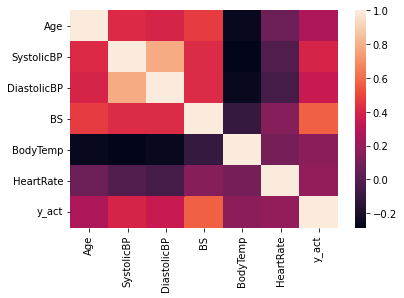

In [ ]:
correlation_matrix = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'y_act']].corr()
sns.heatmap(correlation_matrix)
correlation_matrix

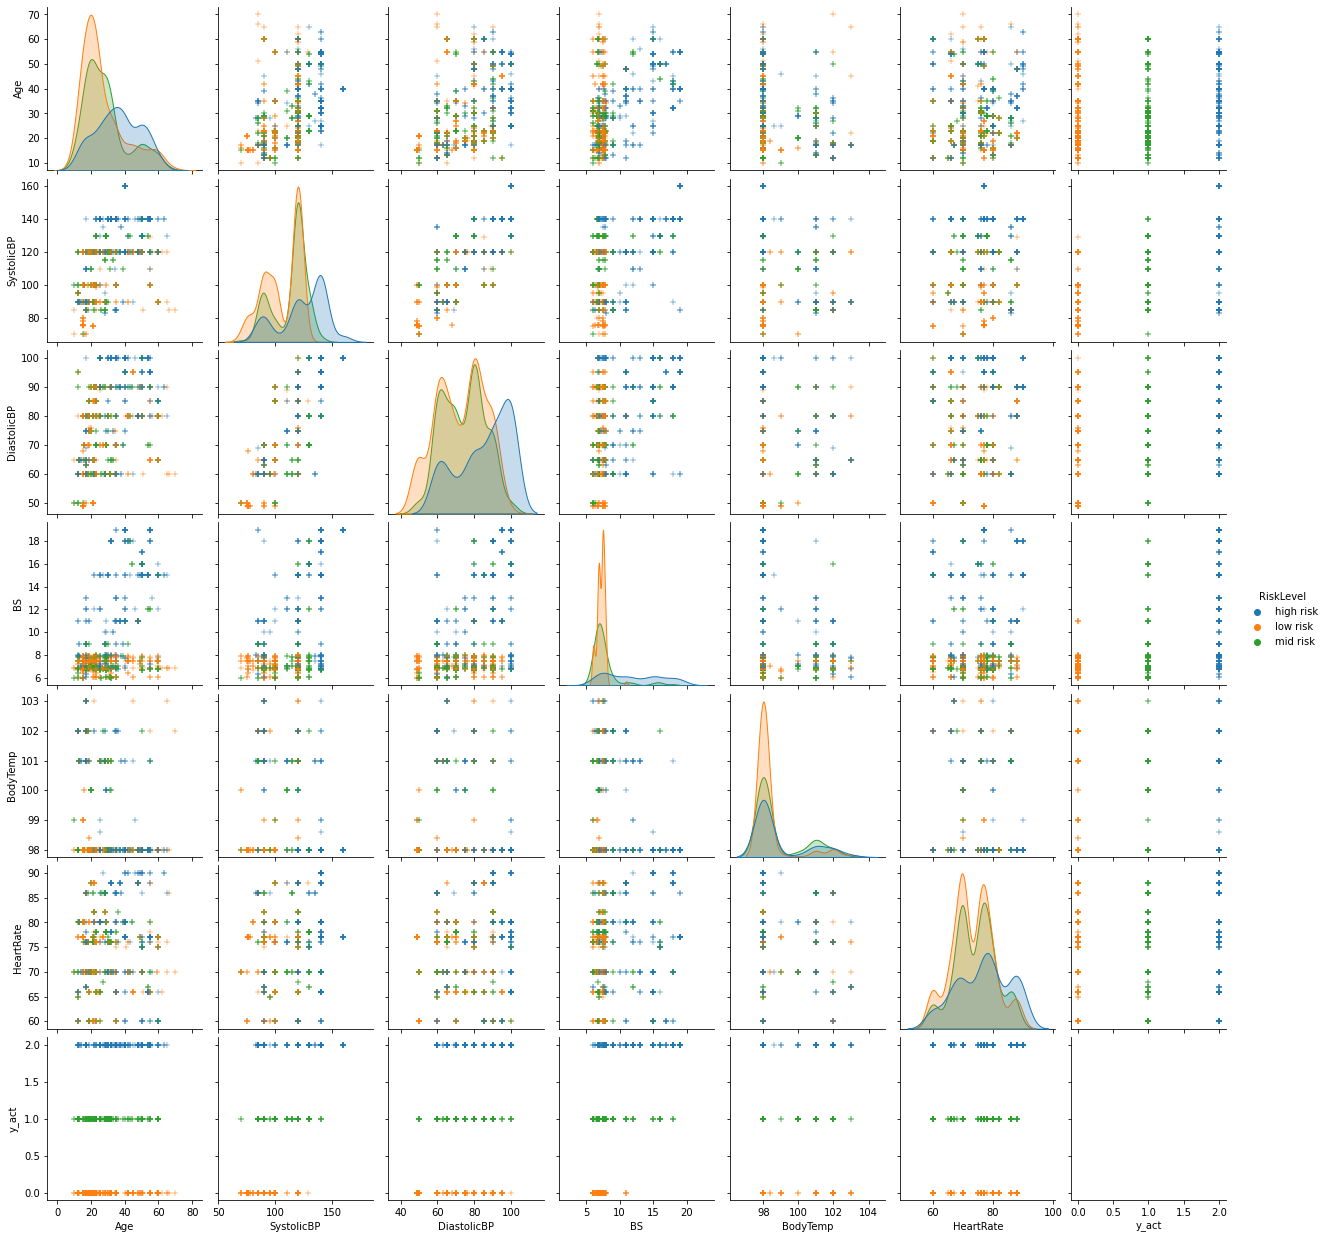

In [ ]:
g = sns.pairplot(data, hue='RiskLevel', markers='+')
plt.show()

**X and y variables**

In [ ]:
X_variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
y_varibale = 'y_act'
X = data[X_variables]
y = data[y_varibale]

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 708
Test sample size  = 304


Decision Tree Classifier

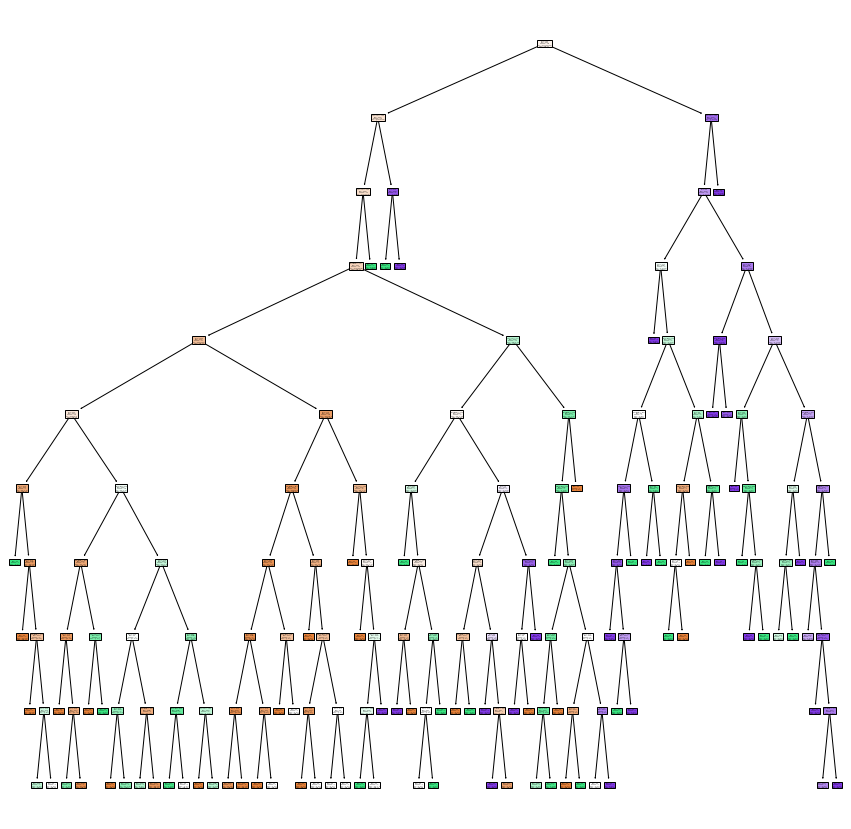

y_pred,0,1,2,All
y_act,,,,
0,96,28,3,127
1,23,75,7,105
2,1,7,64,72
All,120,110,74,304


In [ ]:
# Create model object
model = DecisionTreeClassifier(random_state=101, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

#Visualize Decision Tree
pfig = plt.figure(figsize=(15,15))
class_names = data['RiskLevel'].unique()
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

# Test model
y_pred = model.predict(X_test)
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})

cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

In [ ]:
accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')   #weighted accounts for label imbalance.
print(F"Tree Classifier\nAccuracy: {accuracy} and F1 score: {f1_score}")

Tree Classifier
Accuracy: 0.7730263157894737 and F1 score: 0.7733544388092125


Random Forest Classifier

In [ ]:
# Create model object
#model = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)
model = RandomForestClassifier(random_state=101, n_estimators=20)

# Train Model
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})

cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,2,All
y_act,,,,
0,99,22,6,127
1,16,82,7,105
2,1,5,66,72
All,116,109,79,304


In [ ]:
accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')   #weighted accounts for label imbalance.
print(F"Random Forest classifer\nAccuracy: {accuracy} and F1 score: {f1_score}")

Random Forest classifer
Accuracy: 0.8125 and F1 score: 0.8121354228687534


Support Vector Machines

In [ ]:
# Create model object
model = svm.SVC(kernel='linear', C=1)

# Train Model
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})

cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,2,All
y_act,,,,
0,104,19,4,127
1,49,40,16,105
2,5,11,56,72
All,158,70,76,304


In [ ]:
accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')   #weighted accounts for label imbalance.
print(F"Support Vector Machines\nAccuracy: {accuracy} and F1: {f1_score}")

Support Vector Machines
Accuracy: 0.6578947368421053 and F1: 0.6420204137655661


K-Neighbors Classifier

In [ ]:
# Create model object
model = KNeighborsClassifier(n_neighbors=4)

# Train Model
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})

cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,2,All
y_act,,,,
0,104,14,9,127
1,47,53,5,105
2,10,15,47,72
All,161,82,61,304


In [ ]:
accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')   #weighted accounts for label imbalance.
print(F"K-Neighbors Classifier\nAccuracy: {accuracy} and F1 score: {f1_score}")

K-Neighbors Classifier
Accuracy: 0.6710526315789473 and F1 score: 0.6648952527791944
